In [1]:
import sys
import importlib
import Monty
import Hmm
import numpy as np
import time
import pandas as pd
import datetime
import matplotlib.pyplot as plt 

In [2]:
import numpy as np
import yfinance as yf
import numpy as np
import pandas as pd
import yfinance as yf

import numpy as np
import pandas as pd
import yfinance as yf

def process_stock_data(stock, start_date, end_date):
    """
    Download stock data, process it, and store the mean-adjusted returns.
    
    Parameters:
    - stocks: A list of stock ticker symbols.
    
    Returns:
    - mean_return: A pandas Series of mean-adjusted returns for each stock.
    - data: A DataFrame of mean-adjusted returns with stock tickers as column titles.
    """

    # Download the stock data
    data = yf.download(stocks, start=start_date, end=end_date, interval='1wk')['Adj Close']

    # Forward fill to handle NaN values that might occur
    data.ffill(inplace=True)

    # Take the log of closing prices and then the first difference, multiply by 100
    log_returns = np.log(data + 1e-6).diff().dropna() * 100

    # Handling infinite values by replacing them with NaN
    log_returns.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Optionally, drop rows with any NaN values after handling infinite values
    log_returns.dropna(inplace=True)

    # Calculate the mean of each stock
    mean_returns = log_returns.mean()

    # Subtract the mean from each stock's log returns
    mean_adjusted_data = log_returns - mean_returns

    return mean_returns, mean_adjusted_data
start_date = '2014-01-01'
end_date = '2024-01-01'

# Example usage
stocks = ['ACWI', 'MINV.L', 'SPY','TLT',] 
# start_date = '2014-01-01'
# end_date = '2024-01-01'

# # Example usage
# stocks = ['ACWI', 'TLT', 'MINV.L','IBGL.AS','SPY', 'SHY',]# 'AAPL', 'GOOGL', 'MSFT', 'AMZN']
mean_returns, data = process_stock_data(stocks, start_date, end_date)

print(data.head())
print(mean_returns)
# def process_stock_data(stocks):
#     """
#     Download stock data, process it, and store the mean-adjusted returns.

#     Parameters:
#     - stocks: A list of stock ticker symbols.

#     Returns:
#     - mean_return: A numpy array of mean-adjusted returns for each stock.
#     """
#     # Define the start and end dates
#     start_date = '2014-01-01'
#     end_date = '2024-01-01'

#     # Download the stock data
#     data = yf.download(stocks, start=start_date, end=end_date)

#     # Take the log of closing prices and then the first difference, multiply by 100
#     log_returns = np.log(data['Close'] + 1e-6).diff().dropna() * 100
#     log_returns = log_returns.to_numpy()
#     # Calculate the mean of each stock
#     mean_returns = np.mean(log_returns, axis=0)

#     # Subtract the mean from each stock's log returns
#     data = pd.DataFrame(log_returns - mean_returns)
    

#     return mean_returns, data

# # Example usage
# stocks = ['ACWI', 'MINV.L', 'IBGL.AS', 'SHY'] # ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
# mean_returns, data = process_stock_data(stocks)

# print(data.describe())


[*********************100%%**********************]  4 of 4 completed
                ACWI    MINV.L       SPY       TLT
Date                                              
2014-01-08  0.287452 -0.352692 -0.113911  1.495279
2014-01-15  0.093672 -0.212781  0.059846  1.018408
2014-01-22 -3.091914 -2.911432 -3.031051  1.306908
2014-01-29 -2.571302 -0.530886 -2.293822  1.049054
2014-02-05  3.803603  1.817590  3.471033 -1.358313
ACWI      0.151038
MINV.L    0.184765
SPY       0.217397
TLT       0.038663
dtype: float64


 11%|████▌                                     | 33/300 [00:01<00:09, 28.96it/s]


Model Converged at iteration:  33


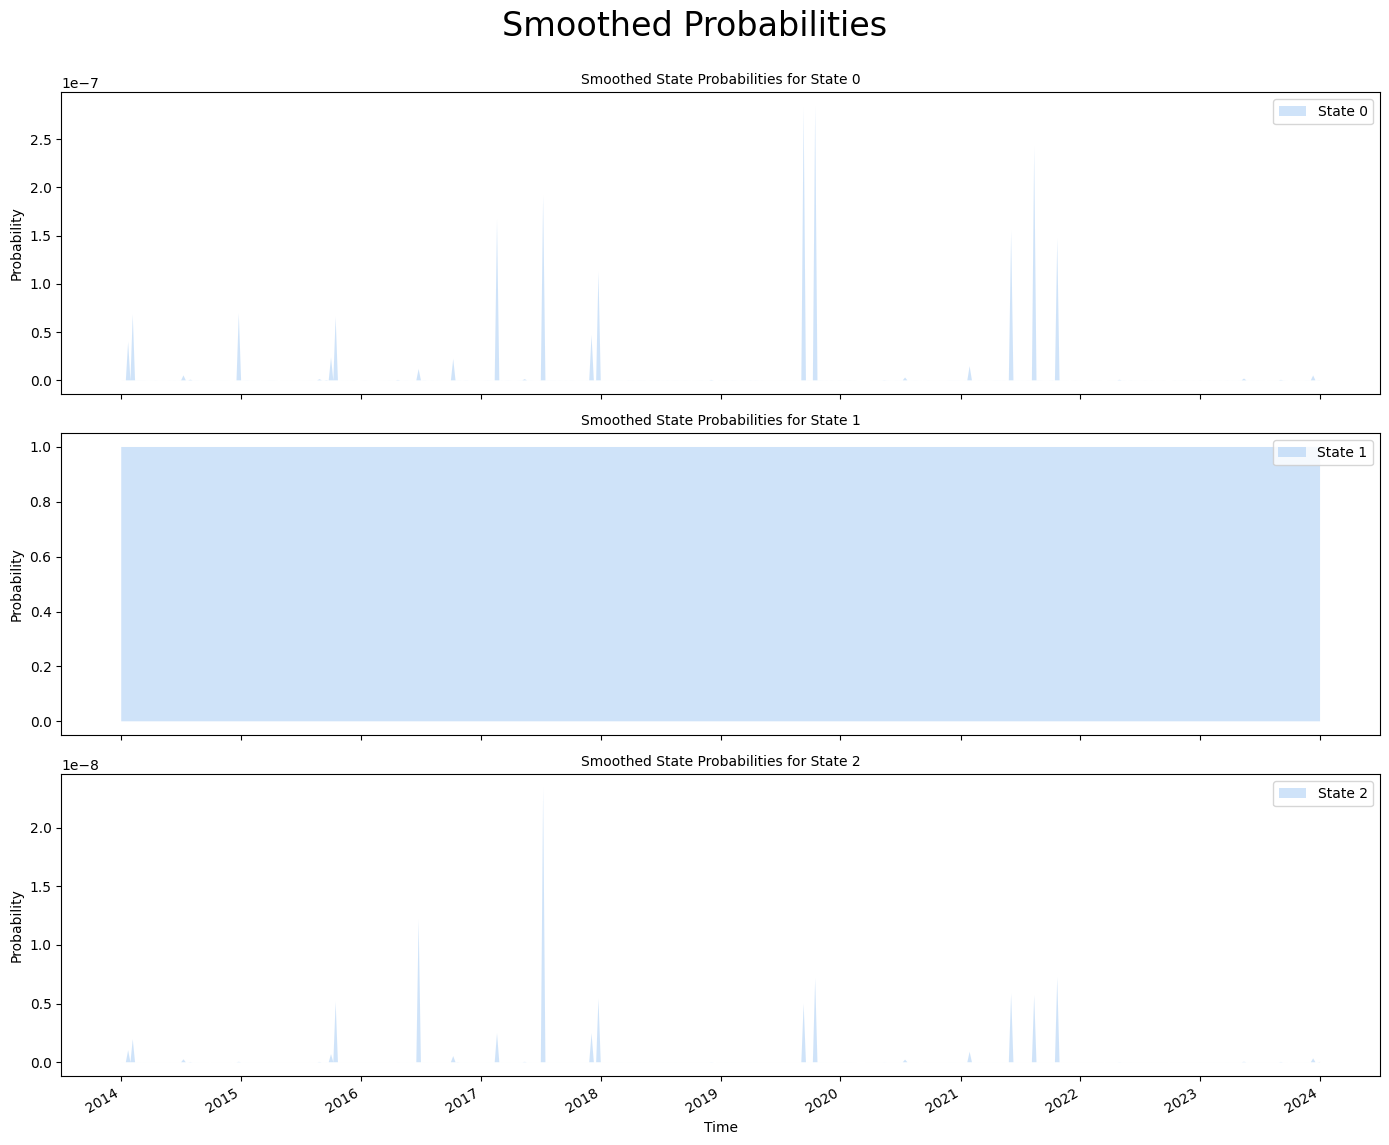

In [7]:
importlib.reload(Hmm)
from Hmm import Base

model = Base(data, max_iterations=300, n_states=3)
model.flashy_fit()
model.numeric_corr()
# model.plot_combined_probabilities(start_date=start_date, end_date=end_date)

# model.plot_correlation_matrices(both=True)

# model.plot_smoothed_probabilities(start_date=start_date, end_date=end_date)

# model.plot_histories()

# model.new_correlation_matrix, 

model.numeric_smoothed_probabilities(start_date=start_date, end_date=end_date)

In [4]:
asdf

NameError: name 'asdf' is not defined

In [ ]:
import numpy as np
import numdifftools as nd

# Assuming model is your fitted model instance with optimized parameters

# Ensure that negative_log_likelihood is correctly defined to accept flattened parameters
# and compute the NLL of your model

# Compute the Hessian at the estimated parameters
hessian_func = nd.Hessian(model.negative_log_likelihood)
flattened_parameters = model.flatten_off_diagonals()  # Or however you've extracted the optimized parameters
hessian_estimated = hessian_func(flattened_parameters)

# Invert the Hessian to get the variance-covariance matrix
covariance_matrix = np.linalg.inv(hessian_estimated)

# Standard errors are the square roots of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance_matrix))

print("Standard Errors:", standard_errors)


In [ ]:

# Invert the Hessian to get the variance-covariance matrix
covariance_matrix = np.linalg.inv(hessian_estimated)
print(np.diag(covariance_matrix))
# Standard errors are the square roots of the diagonal elements
standard_errors = np.sqrt(np.abs(np.diag(covariance_matrix)))

print("Standard Errors:", standard_errors)


In [ ]:
def optimization_results_to_latex_table_with_se(result, standard_errors, labels):
    """
    Generate a LaTeX table from scipy optimization results, including parameter names,
    values, and standard errors, where parameters represent correlations in a multi-state
    correlation matrix structure.
    
    Parameters:
    - result: The result object from scipy.optimize.minimize.
    - standard_errors: An array of standard errors corresponding to the optimization parameters.
    - labels: The labels for the parameters.
    
    Returns:
    - A string containing the LaTeX code for the table.
    """
    
    # Start the table with vertical lines only on the sides
    latex_table = r"""\begin{table}[H]
\centering
\begin{tabular}{|l r r|}
\hline
\textbf{Parameter} & \textbf{Value} & \textbf{Standard Error} \\
\hline
"""
    K = len(labels)  # Assuming 'labels' are provided for all correlations in a flattened format
    n_states = len(result.x) // (K * (K - 1) // 2)  # Assuming each state has the same number of parameters
    param_idx = 0
    for state in range(n_states):
        # Write 'State x' in italics then a horizontal line
        latex_table += r"\textit{" + f"State {state}" + r"}\\" + "\n"
        latex_table += r"\hline" + "\n"
        for i in range(K):
            for j in range(i+1, K):  # Only upper triangular/off-diagonal elements
                label = f"{labels[i]} to {labels[j]}"# in state {state}"
                value = result.x[param_idx]
                error = standard_errors[param_idx]
                latex_table += f"{label} & {value:.4f} & {error:.4f} \\\ \n"
                param_idx += 1
        latex_table += r"\hline" + "\n"
    
    # Add footer rows for optimization results
    latex_table += f"\\textbf{{Objective Function Value}} & {result.fun:.4f} & \\textbf{{N/A}} \\\ \n"
    latex_table += f"\\textbf{{Gradient Norm}} & {np.linalg.norm(result.jac):.4f} & \\textbf{{N/A}} \\\ \n"
    latex_table += f"\\textbf{{Number of Iterations}} & {result.nit} & \\textbf{{N/A}} \\\ \n"
    latex_table += f"\\textbf{{Number of Function Evaluations}} & {result.nfev} & \\textbf{{N/A}} \\\ \n"
    latex_table += f"\\textbf{{Success}} & {'Yes' if result.success else 'No'} & \\textbf{{N/A}} \\\ \n"
    
    # Close the table
    latex_table += r"""\hline
\end{tabular}
\caption{Optimization Results using L-BFGS-B}
\label{tab:optimization_results}
\end{table}
"""
    
    return latex_table

# Assuming `model.result`, `standard_errors`, and `model.labels` are defined:
table = optimization_results_to_latex_table_with_se(model.result, standard_errors, model.labels)
print(table)


In [ ]:
# from scipy.optimize import minimize
# import numpy as np

# def cholesky_form(matrix, N, K):
#     cholesky = np.zeros((N, K, K))
#     for n in range(N):
#         cholesky[n,:,:] = np.linalg.cholesky(matrix[n,:,:])
#     return cholesky
    
    
# # def simulate(K, T, parameters, transition_matrix, cholesky, mu, initial_vol):
# #     # Pre-allocate arrays
# #     processes = np.zeros((K, T))
# #     variances = np.zeros((K, T))
# #     states = np.zeros(T, dtype=int)
# #     innovations = np.random.normal(0, 1, (K, T))  # Pre-generate all innovations
    
    
# #     print(mu.shape)
# #     mu = mu.reshape(-1, 1)
# #     print(mu.shape)
# #     # Initial variance
# #     variances[:, 0] = initial_vol
# #     print(variances[:,0])
# #     # Simulate states with a Markov chain
# #     # This part is inherently sequential but let's try to minimize the loop's impact.
# #     choices = np.arange(transition_matrix.shape[0])
# #     for t in range(1, T):
# #         states[t] = np.random.choice(choices, p=transition_matrix[states[t-1]])
    
# #     # Vectorize the correlation application using pre-simulated innovations
# #     # Note: This approach changes the structure slightly, as we need to correlate all innovations first and then select based on state
# #     correlated_innovations = np.zeros((K, T))
# #     for state in range(transition_matrix.shape[0]):
# #         # Find indices where this state occurs
# #         state_indices = np.where(states == state)[0]
# #         if len(state_indices) > 0:
# #             for i in state_indices:
# #                 correlated_innovations[:, i] = cholesky[state] @ innovations[:, i]
    
# #     # Update variances and processes in a vectorized way
# #     for t in range(1, T):
# #         variances[:, t] = parameters[:, 0] + parameters[:, 1] * (processes[:, t-1]**2) + parameters[:, 2] * variances[:, t-1]
# #         processes[:, t] = np.sqrt(variances[:, t]) * correlated_innovations[:, t]
    
# #     return processes, states, variances#, innovations
# def simulate(K, T, parameters, transition_matrix, cholesky, mu, initial_vol):
#     """
#     Simulate K time series for T periods based on GARCH(1,1) and a state-dependent correlation structure.
    
#     Parameters:
#     - K: Number of time series
#     - T: Number of time periods
#     - parameters: GARCH(1,1) parameters [omega, alpha, beta]
#     - transition_matrix: Markov transition matrix for state changes
#     - cholesky: Precomputed Cholesky matrices for each state
#     - mu: Mean returns for each series
#     - initial_vol: Initial variance for each series
    
#     Returns:
#     - processes: Simulated time series data
#     - states: Simulated states for each time period
#     - variances: Variance of each time series at each time period
#     """
#     # Pre-allocate arrays
#     processes = np.zeros((K, T))
#     variances = np.zeros((K, T))
#     states = np.zeros(T, dtype=int)
#     innovations = np.random.normal(0, 1, (K, T))  # Pre-generate all innovations
    
#     # Initial variance
#     variances[:, 0] = initial_vol
    
#     # Simulate states with a Markov chain
#     for t in range(1, T):
#         states[t] = np.random.choice(np.arange(transition_matrix.shape[0]), p=transition_matrix[states[t-1]])
    
#     # Apply Cholesky decomposition based on states and correlate innovations
#     for state in np.unique(states):
#         indices = np.where(states == state)[0]
#         correlated_innovations = cholesky[state] @ innovations[:, indices]
#         innovations[:, indices] = correlated_innovations
    
#     # # Update variances and processes in a vectorized way
#     # for t in range(1, T):
#     #     variances[:, t] = parameters[:,0] + parameters[:,1] * (processes[:, t-1]**2) + parameters[:,2] * variances[:, t-1]
#     #     processes[:, t] = mu[:, np.newaxis] + np.sqrt(variances[:, t]) * innovations[:, t]
#     for t in range(1, T):
#         variances[:, t] = parameters[:, 0] + parameters[:, 1] * (processes[:, t-1]**2) + parameters[:, 2] * variances[:, t-1]
#         # Ensure mu is correctly shaped (K,) for broadcast
#         processes[:, t] = np.sqrt(variances[:, t]) * innovations[:, t]

#     return processes, states, variances

# def get_portfolio_returns(initial_vol, transition_matrix, mean_returns, univariate_parameters, correlation_matrices, forecast_period=252, simulations=1000):
#     # Setup
#     N, K, E = correlation_matrices.shape
#     T = forecast_period
#     S = simulations
#     mean_return = mean_returns#.to_numpy()
#     mu = mean_return#.reshape(-1)

#     mu_array =  np.ones((K,T))
#     for t in range(T):
#         mu_array[:,t] = mu * mu_array[:,t] 

    
#     cholesky_matrix = cholesky_form(correlation_matrices, N, K)
#     print(mean_return.shape)
#     # Initialize arrays to store simulations
#     states = np.zeros((S, T), dtype=int)
#     simulated_returns = np.zeros((S,K,T))
#     simulated_volatility = np.zeros((S, K,T))
    
#     # Simulate Data
#     for s in range(S):
#         processes, s_states, variances = simulate(K, T, univariate_parameters, transition_matrix, cholesky_matrix, mu, initial_vol)
        
#         # For broadcasting mean_return correctly across the time dimension, add it to each time point for each simulation
#         # Store the results
#         states[s, :] = s_states
#         simulated_returns[s, :, :] = processes + mu_array
#         simulated_volatility[s, :, :] = variances
        
#     simulated_returns[:, :, :] = simulated_returns[:, :, :]    
#     # Cumsum
    
#     # Sum across simulations and take the cumulative sum
#     mean_returns = np.mean(simulated_returns, axis=0)
#     mean_volatility = np.mean(simulated_volatility, axis=0)
#     mean_states = np.mean(states, axis=0)
#     cum_mean = np.cumsum(mean_returns, axis=1)
    
#     return mean_returns, mean_volatility, mean_states, cum_mean

# def optimize_portfolio(initial_vol, transition_matrix, mean_returns, univariate_parameters, correlation_matrices, risk_free_return = 0.001, initial_wealth=1, gamma=5, forecast_period=252, simulations=1000):
#     # Get The Data for optimization
#     # mean_returns, mean_volatility, mean_states, mean_cum = get_portfolio_returns(initial_vol,transition_matrix, mean_returns, univar_params, correlaitons, simulations=1000, forecast_period=252)
#     N, K, E = correlation_matrices.shape
#     # Maximize ut    T = forecast_periodility by integration over sample paths
#     weights = np.ones(K) / (K + 1)
#     identity_vector = np.ones(K)
#     risk_free_weight = 1 - weights.dot(identity_vector)
#     T = forecast_period
#     weighted_risk_free_return = risk_free_weight * np.exp(T * risk_free_return)
#     # expected_wealth = 
#     print(weighted_risk_free_return)
    
#     bounds = [(0, 1)] * K

#     return mean_returns, mean_volatility, mean_states, mean_cum



# def minimize_utility(wealth=1, gamma=5):
#     utility = (wealth ** (1-gamma)) / (1 - gamma) 
    
#     return utility


# p = max_utility()



# initial_vol = model.standard_deviations[:, -1]
# transition_matrix = model.transition_matrix

# univar_params = model.univariate_parameters
# correlaitons = model.correlation_matrix
model.transition_matrix
# # 
# mean_returns, mean_volatility, mean_states, mean_cum = optimize_portfolio(initial_vol,transition_matrix, mean_returns, univar_params, correlaitons, simulations=1000, forecast_period=252)

In [ ]:
import seaborn as sns
from scipy.optimize import minimize
class UtilityOptimize:
    """docstring for UtilityOptimize"""
    def __init__(self, initial_volatility, transition_matrix, univariate_parameters, correlation_matrix, mu, risk_free_return=0.0, initial_wealth=1, gamma=5, forecast_period=252, simulations=100):
        self.initial_volatility = initial_volatility / 100
        self.transition_matrix = transition_matrix 
        self.univariate_parameters = univariate_parameters 
        self.correlation_matrix = correlation_matrix 
        self.mu = mu 
        self.risk_free_return = risk_free_return
        self.initial_wealth = initial_wealth
        self.gamma = gamma
        self.forecast_period = forecast_period
        self.simulations = simulations

        # Set Shorthand
        self.N, self.K, self.E = correlation_matrix.shape 
        self.T = self.forecast_period
        self.S = self.simulations

        # Cholesky matrix
        self.cholesky_correlation = self.cholesky_form(self.correlation_matrix)




    def fit(self):
        '''
        Cholesky decomposition
        Gets portfolio returns 
        Runs minimize function
        '''
        self.get_portfolio_returns()

        #self.result = self.minimize_utility()

    def cholesky_form(self, matrix):
        cholesky = np.zeros((self.N, self.K, self.K))
        for n in range(self.N):
            cholesky[n,:,:] = np.linalg.cholesky(matrix[n,:,:])
        return cholesky


    def get_portfolio_returns(self):
        """
        Simulates the required number of dataseries
        """
        mu_array = np.ones((self.K,self.T))
        for t in range(self.T):
            mu_array[:,t] = self.mu * mu_array[:,t] 

        # Initialize arrays to store simulations
        states = np.zeros((self.S, self.T), dtype=int)
        simulated_returns = np.zeros((self.S, self.K, self.T))
        simulated_volatility = np.zeros((self.S, self.K, self.T))
        simulated_means = np.zeros((self.S, self.K))
        simulated_covariance = np.zeros((self.S, self.K, self.K))
        # Simulate Data
        for s in range(self.S):
            processes, s_states, variances = self.simulate()

            #Store Results
            states[s,:] = s_states
            simulated_returns[s,:,:] = processes + mu_array
            simulated_volatility[s,:,:] = variances
            simulated_means[s,:] = np.mean(simulated_returns[s], axis=-1)
            simulated_covariance[s,:,:] =np.cov(simulated_returns[s])

        self.states = states
        self.simulated_returns = simulated_returns
        self.simulated_volatility = simulated_volatility
        self.simulated_means = simulated_means
        self.simulated_covariance = simulated_covariance
        self.cumulated_returns = np.cumsum(self.simulated_returns, axis=2)

        self.mean = np.mean(self.simulated_means, axis=0)
        self.covariance= np.mean(self.simulated_covariance, axis=0)
        
    def simulate(self):
        """
        Simulates K timeseries for T periods, based on the GARCH(1,1) model, and state depemndent correlations
        

        Parameters:
        - K: Number of time series
        - T: Number of time periods
        - parameters: GARCH(1,1) parameters [omega, alpha, beta]
        - transition_matrix: Markov transition matrix for state changes
        - cholesky: Precomputed Cholesky matrices for each state
        - mu: Mean returns for each series
        - initial_vol: Initial variance for each series

        Returns:
        - processes: Simulated time series data
        - states: Simulated states for each time period
        - variances: Variance of each time series at each time period
        """
        # Pre-allocate Arrays
        processes = np.zeros((self.K, self.T))
        variances = np.zeros((self.K, self.T))
        states = np.zeros(self.T, dtype=int)
        innovations = np.random.normal(0, 1, (self.K, self.T))
        # Initial Variance
        variances[:,0] = self.initial_volatility
        # Simulate states with a Markov chain
        for t in range(1, self.T):
            states[t] = np.random.choice(np.arange(self.transition_matrix.shape[0]), p=self.transition_matrix[states[t-1]])

        # Apply Cholesky decomposition based on states and correlate innovations
        for state in np.unique(states):
            indices = np.where(states == state)[0]
            correlated_innovations = self.cholesky_correlation [state] @ innovations[:, indices]
            innovations[:, indices] = correlated_innovations
        
        # Update variances and processes in a vectorized way
        for t in range(1, self.T):
            variances[:, t] = self.univariate_parameters[:, 0] + self.univariate_parameters[:, 1] * (processes[:, t-1]**2) + self.univariate_parameters[:, 2] * variances[:, t-1]
            processes[:, t] = np.sqrt(variances[:, t]) * innovations[:, t]

        return processes, states, variances

    def minimize_utility(self, ):
        """
        Calculates the risky and risk free returns, T periods ahead.
        Then minimizes the objective function
        """
        self.cumulated_risk_free_return = np.exp(self.T * self.risk_free_return) 

        self.exponential_cumulated_returns = np.exp(self.cumulated_returns[:,:, -1] - self.cumulated_returns[:,:, 0])

        bounds = [(0, 1)] * self.K
        initial_weights = np.ones(self.K) / (self.K + 1)
        
        self.result = minimize(self.objective, 
                              initial_weights, 
                              method='L-BFGS-B', 
                              bounds=bounds)
        

        
    def objective(self, weights):
        """
        Calculates weigted return
        Calculates the expected utility
        Calculates the mean expected utility
        return - mean returns
        """
        risk_free_identity = np.ones(self.K)
        risk_free_weight = 1 - risk_free_identity.dot(weights)
        einsum_returns = np.einsum('k,sk->s', weights, self.exponential_cumulated_returns)
        weighted_risk_free_return = np.ones(self.S) * risk_free_weight * self.cumulated_risk_free_return 

        utility = ((einsum_returns + weighted_risk_free_return) ** (1 - self.gamma)) / (1 - self.gamma)
        expected_utility = np.mean(utility, axis=0)


        return - expected_utility



initial_volatility = model.standard_deviations[:, -1]
transition_matrix = model.transition_matrix
mu = mean_returns.to_numpy()
univariate_parameters = model.univariate_parameters
correlation_matrix = model.correlation_matrix
portfolio = UtilityOptimize(initial_volatility, transition_matrix, univariate_parameters, correlation_matrix, mu, gamma=1.3,simulations=10000, forecast_period=520)
portfolio.fit()
portfolio.minimize_utility()
print(portfolio.result.x)
risk_free = 1 - np.sum(portfolio.result.x)
risk_free

In [ ]:
print(portfolio.mean.shape)
print(portfolio.covariance.shape)
print(portfolio.mean)
print(portfolio.covariance)
portfolio.simulated_returns.shape

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from scipy.stats.mstats import gmean
forecast = 1
symbols = stocks
optimization_criterion = 'sharpe'

returns= portfolio.mean
covariance = portfolio.covariance
std = np.sqrt(np.diag(portfolio.covariance))
# Definir la función objetivo para la optimización de la relación de Sharpe
def objective_sharpe(weights): 
    return -np.dot(weights, returns) / np.sqrt(np.dot(weights.T, np.dot(covariance * forecast, weights)))

# Definir la función objetivo para la optimización del CVaR
def objective_cvar_10(weights):
    portfolio_returns = np.dot(returns, weights)
    portfolio_mean = portfolio_returns
    portfolio_std = np.dot(std, weights)
    conf_level = 0.10  # Nivel de confianza para el CVaR
    cvar = portfolio_mean - portfolio_std * norm.ppf(conf_level)
    return cvar
def objective_cvar_5(weights):
    portfolio_returns = np.dot(returns, weights)
    portfolio_mean = portfolio_returns
    portfolio_std = np.dot(std, weights)
    conf_level = 0.05  # Nivel de confianza para el CVaR
    cvar = portfolio_mean - portfolio_std * norm.ppf(conf_level)
    return cvar
def objective_cvar_1(weights):
    portfolio_returns = np.dot(returns, weights)
    portfolio_mean = portfolio_returns
    portfolio_std = np.dot(std, weights)
    conf_level = 0.01  # Nivel de confianza para el CVaR
    cvar = portfolio_mean - portfolio_std * norm.ppf(conf_level)
    return cvar
# # Definir la función objetivo para la optimización de la relación de Sortino
# def objective_sortino(weights):
#     portfolio_returns = np.dot(returns, weights)
#     downside_returns = portfolio_returns[portfolio_returns < 0]
#     downside_std = downside_returns.std()
#     sortino_ratio = portfolio_returns / downside_std
#     return -sortino_ratio  # Maximizar la relación de Sortino

# Definir la función objetivo para la minimización de la varianza
def objective_variance(weights):
    return np.dot(weights.T, np.dot(covariance * forecast, weights))

# Las restricciones
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Los límites para los pesos
bounds = tuple((0, 1) for x in range(len(symbols)))


# Optimización
init_guess = np.array(len(symbols) * [1. / len(symbols),])
if optimization_criterion == 'sharpe':
    opt_results = minimize(objective_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
elif optimization_criterion == 'cvar':
    opt_results = minimize(objective_cvar, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
# elif optimization_criterion == 'sortino':
#     opt_results = minimize(objective_sortino, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
elif optimization_criterion == 'variance':
    opt_results = minimize(objective_variance, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

# Los pesos óptimos
optimal_weights = opt_results.x


# Optimizar todos los criterios
opt_results_cvar = minimize(objective_cvar, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
# opt_results_sortino = minimize(objective_sortino, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results_variance = minimize(objective_variance, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results_sharpe = minimize(objective_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

# Pesos óptimos para cada criterio

optimal_weights_cvar = opt_results_cvar.x
# optimal_weights_sortino = opt_results_sortino.x
optimal_weights_variance = opt_results_variance.x
optimal_weights_sharpe = opt_results_sharpe.x

# Graficar la frontera eficiente
port_returns = []
port_volatility = []
sharpe_ratio = []
all_weights = []  # almacena los pesos de todas las carteras simuladas

num_assets = len(symbols)
num_portfolios = 50000

#np.random.seed(101)

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns_portfolio = np.dot(weights, returns) * forecast
    volatility = np.sqrt(np.dot(weights.T, np.dot(covariance * forecast, weights)))
    sr = returns_portfolio / volatility
    sharpe_ratio.append(sr)
    port_returns.append(returns_portfolio)
    port_volatility.append(volatility)
    all_weights.append(weights)  # registra los pesos para esta cartera

plt.figure(figsize=(12, 8))
plt.scatter(port_volatility, port_returns, c=sharpe_ratio, cmap='vlag_r')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Calcular y graficar los retornos y la volatilidad del portafolio óptimo para cada criterio

# opt_returns_cvar_ = np.dot(optimal_weights_cvar, returns) * forecast
# opt_volatility_cvar_ = np.sqrt(np.dot(optimal_weights_cvar.T, np.dot(covariance * forecast, optimal_weights_cvar)))
# opt_portfolio_cvar= plt.scatter(opt_volatility_cvar, opt_returns_cvar, color='darkolivegreen', s=50, label='CVaR pct.')


# opt_returns_sortino = np.dot(optimal_weights_sortino, returns) * forecast
# opt_volatility_sortino = np.sqrt(np.dot(optimal_weights_sortino.T, np.dot(covariance * forecast, optimal_weights_sortino)))
# opt_portfolio_sortino = plt.scatter(opt_volatility_sortino, opt_returns_sortino, color='g', s=50, label='Sortino')

opt_returns_variance = np.dot(optimal_weights_variance, returns) * forecast
opt_volatility_variance = np.sqrt(np.dot(optimal_weights_variance.T, np.dot(covariance * forecast, optimal_weights_variance)))
opt_portfolio_variance = plt.scatter(opt_volatility_variance, opt_returns_variance, color='darkslateblue', s=50, label='Variance')

opt_returns_sharpe = np.dot(optimal_weights_sharpe, returns) * forecast
opt_volatility_sharpe = np.sqrt(np.dot(optimal_weights_sharpe.T, np.dot(covariance * forecast, optimal_weights_sharpe)))
opt_portfolio_sharpe = plt.scatter(opt_volatility_sharpe, opt_returns_sharpe, color='darkred', s=50, label='Sharpe')

plt.legend(loc='upper right')

plt.show()



In [ ]:
def find_max_drawdown(portfolio):
    draw_downs = np.zeros(portfolio.S)
    for s in range(portfolio.S):
        draw_downs[s] = max_drawdown(portfolio.simulated_returns[s,:,:])

    draw_down = np.mean(draw_downs)
    return draw_down
# Función para calcular el drawdown máximo
def max_drawdown(return_series):
    comp_ret = (1 + return_series).cumprod()
    peak = np.expand_dims(comp_ret, axis=-1).max()
    dd = (comp_ret/peak) - 1
    return dd.min()

# Función para calcular estadísticas descriptivas más detalladas
def detailed_portfolio_statistics(portfolio, weights):
    portfolio_returns = returns.dot(weights)
    print(portfolio_returns.shape)
    # Estadísticas descriptivas generales
    mean_return_annualized = gmean(portfolio_returns + 1)**forecast - 1
    std_dev_annualized = std.dot(weights) * np.sqrt(forecast)
    skewness = skew(portfolio_returns)
    kurt = kurtosis(portfolio_returns)
    max_dd = find_max_drawdown(portfolio)
    count = 52
    
    # Métricas de optimización
    risk_free_rate = 0.00
    sharpe_ratio = (mean_return_annualized - risk_free_rate) / std_dev_annualized
    conf_level = 0.05
    cvar = mean_return_annualized - std_dev_annualized * norm.ppf(conf_level)
    downside_returns = portfolio_returns[portfolio_returns < 0]
    downside_std_dev = downside_returns.std() * np.sqrt(forecast)
    sortino_ratio = mean_return_annualized / downside_std_dev
    variance = std_dev_annualized ** 2 
    
    return mean_return_annualized, std_dev_annualized, skewness, kurt, count, sharpe_ratio, cvar, sortino_ratio, variance

# Calcular estadísticas para cada portafolio
#optimal_weights_cvar = detailed_portfolio_statistics(portfolio, optimal_weights_cvar)

#statistics_sortino = detailed_portfolio_statistics(optimal_weights_sortino)
statistics_variance = detailed_portfolio_statistics(portfolio, optimal_weights_variance)
statistics_sharpe = detailed_portfolio_statistics(portfolio, optimal_weights_sharpe)

# Nombres de las estadísticas
statistics_names = ['Annual return', 'Annualized Volatility', 'Skewness', 'Kurtosis',  'Number of observations', 'Sharpe Ratio', 'CVaR', 'Sortino Ratio', 'Variance']

# Diccionario que asocia los nombres de los métodos de optimización con los pesos óptimos y las estadísticas
portfolio_data = {
    'Sharpe': {
        'weights': optimal_weights_sharpe,
        'statistics': detailed_portfolio_statistics(portfolio, optimal_weights_sharpe)
    },
    'Variance': {
        'weights': optimal_weights_variance,
        'statistics': detailed_portfolio_statistics(portfolio, optimal_weights_variance)
    },
    # 'CVaR risk pdt': {
    #     'weights': optimal_weights_cvar,
    #     'statistics': detailed_portfolio_statistics(portfolio, optimal_weights_cvar)
    # },

}

# Imprimir los pesos y las estadísticas para cada método de optimización
for method, data in portfolio_data.items():
    print("\n")
    print("========================================================================================================")
    print("\n")
    print(f"Optimal Asset allocation with {method}:")
    print("\n")
    for symbol, weight in zip(symbols, data['weights']):
        if weight < 1e-4:  # considera cualquier peso menor que 0.01% como cero
            print(f"{symbol}: prácticamente 0%")
        else:
            print(f"{symbol}: {weight*100:.2f}%")

    print("\n")
    print(f"Descriptive Statistics with  {method}:")
    print("\n")
    for name, stat in zip(statistics_names, data['statistics']):
        print(f"{name}: {stat if name != 'Forecasted periods' else stat:.2f}")

print("\n")
print("========================================================================================================")


In [ ]:
full_weight = np.sum(portfolio.result.x)
weights = portfolio.result.x / full_weight

print('Portfolio weights without Risk Free Return:')
for i, label in enumerate(model.labels):
    print(f'Asset: {label},   Weight: {round(weights[i]* 100,2 )}')

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from scipy.stats.mstats import gmean
forecast = 52
symbols = stocks
optimization_criterion = 'sharpe'
# Definir la función objetivo para la optimización de la relación de Sharpe
def objective_sharpe_test(weights):
    S, K, T = portfolio.simulated_returns.shape
    sharpe = np.zeros(S)
    #print('Hello World!')
    for s in range(S):
        sharpe[s] = np.dot(weights, np.mean(portfolio.simulated_returns[s,:,:], axis=-1)) / np.sqrt(np.dot(weights.T, np.dot(np.cov(portfolio.simulated_returns[s,:,:]) * forecast, weights)))
    return - np.mean(sharpe)

# Las restricciones
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Los límites para los pesos
bounds = tuple((0, 1) for x in range(len(symbols)))


# Optimización
init_guess = np.array(len(symbols) * [1. / len(symbols),])

opt_results = minimize(objective_sharpe_test, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
# Los pesos óptimos
optimal_weights = opt_results.x

print(round((optimal_weights * 100), 2))
- objective_sharpe_test(optimal_weights)

In [ ]:
new_weights = (optimal_weights * 100)
print(np.round(new_weights, 2))
- objective_sharpe_test(optimal_weights)


In [ ]:
pf_var = weights.dot(portfolio.covariance.dot(weights)) / np.sqrt(520) * 100
pf_std = np.sqrt(pf_var)
print(pf_var, pf_std)

In [ ]:
np.sqrt(520)

In [ ]:

standard_deviations = np.mean(std, axis=1)
diag = np.diag(standard_deviations)
cov = diag @ corr @ diag
cov


In [ ]:
import numpy as np
from numpy.linalg import inv
import cvxpy as cp

def optimize_portfolio(cov_matrix, expected_returns, target_return):
    """
    Finds the optimal portfolio weights using Markowitz optimization.
    
    Parameters:
    - cov_matrix: A covariance matrix of asset returns.
    - expected_returns: An array of expected returns for each asset.
    - target_return: The target return for the portfolio.
    
    Returns:
    - A tuple (weights, risk), where 'weights' is an array of optimal asset weights, and 'risk' is the portfolio risk (standard deviation).
    """
    num_assets = len(expected_returns)
    
    # Define the optimization variables
    weights = cp.Variable(num_assets)
    
    # Define the objective function (minimize portfolio variance)
    portfolio_variance = cp.quad_form(weights, cov_matrix)
    objective = cp.Minimize(portfolio_variance)
    
    # Define the constraints
    constraints = [
        cp.sum(weights) == 1,  # Sum of weights must be 1
        weights >= 0,          # No short selling
        cp.matmul(weights, expected_returns) >= target_return  # Target return constraint
    ]
    
    # Define and solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    # Extract the optimal weights and calculate portfolio risk
    optimal_weights = weights.value
    portfolio_risk = cp.sqrt(portfolio_variance).value
    
    return optimal_weights, portfolio_risk

 # Correct matrix multiplication for covariance
data =  data + means[:,np.newaxis]
# mu_1 = np.mean(data * u_hat[0], axis=1)  # Expected returns vector
# mu_2 = np.mean(data * u_hat[1], axis=1)  # Expected returns vector
mu = np.mean((data),axis=1)
mu_p = 0.02  # Target return
print(f'Returns Combined :  \n{mu}')
# print(f'Returns in state 1:  \n{mu_1}')
# print(f'Returns in state 2:  \n{mu_2}')


# optimal_weights_1, portfolio_risk_1 = optimize_portfolio(cov_1, mu_1, mu_p)
# optimal_weights_2, portfolio_risk_2 = optimize_portfolio(cov_2, mu_2, mu_p)
optimal_weights, portfolio_risk = optimize_portfolio(cov, mu, mu_p)
print(f'Optimal Weigts Combined :  \n{optimal_weights}')
# print(f'Optimal Weigts in state 1:  \n{optimal_weights_1}')
# print(f'Optimal Weigts in state 2:  \n{optimal_weights_2}')
print(portfolio_risk)#, portfolio_risk_1, portfolio_risk_2)
retun = optimal_weights * mu
mean_return = np.mean(retun)
sharpe = mean_return / portfolio_risk
sharpe

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
# Setting the random seed for reproducibility


# Creating a linspace from 0.1 to 5 with a step of 0.1
gammas = np.arange(5.0,1.45,  -0.01)

# Initialize lists to store the results
portfolios_x = [[] for _ in range(9)]  # Assuming portfolio.result.x has 4 elements
risk_frees = []

# Iterate over each initial_volatility
for g in tqdm(gammas):
    portfolio = UtilityOptimize(initial_volatility, transition_matrix, univariate_parameters, correlation_matrix, mu, gamma=g, simulations=100000, forecast_period=52)
    portfolio.fit()
    portfolio.minimize_utility()

    # Collect results
    for i, x in enumerate(portfolio.result.x):
        portfolios_x[i].append(x)
    risk_free = 1 - np.sum(portfolio.result.x)
    risk_frees.append(risk_free)



In [ ]:

# Creating a linspace from 0.1 to 5 with a step of 0.1
gammas = np.arange(5.0,1.45,  -0.01)
# Plotting
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
for i, ax in enumerate(axs[:-1]):
    ax.plot(gammas, portfolios_x[i], label=f'Portfolio component {i+1}')
    ax.set_title(f'Portfolio component {i+1}')
    ax.set_xlabel('Initial Volatility')
    ax.set_ylabel('Value')
    ax.legend()
# Plot for risk_free
axs[-1].plot(gammas, risk_frees, label='Risk-Free Asset', color='red')
axs[-1].set_title('Risk-Free Asset')
axs[-1].set_xlabel('Degree of Risk Aversion, Gamma')
axs[-1].set_ylabel('Value')
axs[-1].legend()

plt.tight_layout()
plt.savefig('3 Weekly Portfolio.png')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from scipy.stats.mstats import gmean

# Seleccionar Criterio de Optimización
# Select Optimization Criteria 
# CVaR is Expected Shortfall, 
# Sortino uses Downside Volatility

optimization_criterion = 'cvar'  # Cambia a 'sharpe', 'cvar', 'sortino' o 'variance' para optimizar esos criterios

# # Assets and Start Date
# start_date = '2019-01-01'
# end_date = '2021-01-01'

# # Example usage
# symbols = ['ACWI', 'MINV.L', 'IBGL.AS', 'SHY']
symbols = stocks
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Calculate the returns
returns = np.log(data).diff().dropna() * 100

# Define objective function for sharpe ratio
def objective_sharpe(weights): 
    # First Part: Dot product of weights and return mean.
    # Second Part: Square-Root of the dot product of weights and A,
    # A is the dot product of the covariance of returns multiplied by trading days, and the weights.
    return -np.dot(weights, returns.mean()) / np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

# Define the Objective Function for Expected Shortfall
def objective_cvar(weights):
    # Calculate Weighted Returns
    portfolio_returns = np.dot(returns, weights)
    # Mean of weighted returns
    portfolio_mean = portfolio_returns.mean()
    # Calculate the portfolio returns standard deviation
    portfolio_std = portfolio_returns.std()
    # Confidence Level for Expected Shortfall
    conf_level = 0.05  # Nivel de confianza para el CVaR

    # CVaR or ES is the mean return of the portfolio minus standard deviation multiplied by the inverse of Cumulative normal Distribution Function  
    cvar = portfolio_mean - portfolio_std * norm.ppf(conf_level)
    return cvar

# Define Objective Function for Sortino
def objective_sortino(weights):
    # Calculate Weighted Portfolio Returns
    portfolio_returns = np.dot(returns, weights)
    # Select the negative Returs
    downside_returns = portfolio_returns[portfolio_returns < 0]
    # Calculate the Standard Deviation of the negative returns
    downside_std = downside_returns.std()
    # Calculate the Sortino Ratio as the Portfolio Mean divided by the downside standard deviation
    sortino_ratio = portfolio_returns.mean() / downside_std
    return -sortino_ratio  # Maximizar la relación de Sortino

# Define Objective Function for Variance minimization 
def objective_variance(weights):
    # Dot of Covariance for 252 trading days and weights, dot transformed weights
    return np.dot(weights.T, np.dot(returns.cov() * 252, weights))

# Function Constraint
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds
bounds = tuple((0, 1) for x in range(len(symbols)))

# Optimize. Initial Guess is a numpy array containing 1 / number of assets
init_guess = np.array(len(symbols) * [1. / len(symbols),])
# Use If to select the correct objective function
if optimization_criterion == 'sharpe':
    opt_results = minimize(objective_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
elif optimization_criterion == 'cvar':
    opt_results = minimize(objective_cvar, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
elif optimization_criterion == 'sortino':
    opt_results = minimize(objective_sortino, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
elif optimization_criterion == 'variance':
    opt_results = minimize(objective_variance, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

# The optimal asset allocation
optimal_weights = opt_results.x


# Optimize for all objective funciton criteria
opt_results_cvar = minimize(objective_cvar, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results_sortino = minimize(objective_sortino, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results_variance = minimize(objective_variance, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results_sharpe = minimize(objective_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

# Optimal Asset Allocation for Each Objective function Criteria
optimal_weights_cvar = opt_results_cvar.x
optimal_weights_sortino = opt_results_sortino.x
optimal_weights_variance = opt_results_variance.x
optimal_weights_sharpe = opt_results_sharpe.x

# Plot the Efficient Frontier
port_returns = []
port_volatility = []
sharpe_ratio = []
all_weights = []  # Stores all simulated oprtfolio weights

# Number of Assets
num_assets = len(symbols)
# Number of Portfolio simulations
num_portfolios = 500000

# Set Seed for Reproducibility
# np.random.seed(101)

# For each portfolio in number of portfolios to be simulated
for single_portfolio in range(num_portfolios):
    # Choose weights randomly
    weights = np.random.random(num_assets)
    # Divide by sum to ensure they sum to 1
    weights /= np.sum(weights)
    # Portfolio Returns for the next 252 days, 1 year ahead.
    returns_portfolio = np.dot(weights, returns.mean()) * 252
    # Portfolio Volatility, The square root of the weights dot A,
    # A being The return covariance multiplied by 252, dotted by the weights
    volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    # Sharpe Ratio is return on portfolio divided by volatility
    sr = returns_portfolio / volatility
    # Append Sharpe Ratio
    sharpe_ratio.append(sr)
    # Append Returns 
    port_returns.append(returns_portfolio)
    # Append Volatility
    port_volatility.append(volatility)
    # Append Weights
    all_weights.append(weights)  # registra los pesos para esta cartera

# Create Figure
plt.figure(figsize=(12, 8))

# Create Scatterplot of volatility and returns, colored by sharpe ratio
plt.scatter(port_volatility, port_returns, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Calculate the optimal portolio choice return and vilatility for each criteria
# Calcular y graficar los retornos y la volatilidad del portafolio óptimo para cada criterio
opt_returns_cvar = np.dot(optimal_weights_cvar, returns.mean()) * 252
opt_volatility_cvar = np.sqrt(np.dot(optimal_weights_cvar.T, np.dot(returns.cov() * 252, optimal_weights_cvar)))
opt_portfolio_cvar = plt.scatter(opt_volatility_cvar, opt_returns_cvar, color='hotpink', s=50, label='CVaR')

opt_returns_sortino = np.dot(optimal_weights_sortino, returns.mean()) * 252
opt_volatility_sortino = np.sqrt(np.dot(optimal_weights_sortino.T, np.dot(returns.cov() * 252, optimal_weights_sortino)))
opt_portfolio_sortino = plt.scatter(opt_volatility_sortino, opt_returns_sortino, color='g', s=50, label='Sortino')

opt_returns_variance = np.dot(optimal_weights_variance, returns.mean()) * 252
opt_volatility_variance = np.sqrt(np.dot(optimal_weights_variance.T, np.dot(returns.cov() * 252, optimal_weights_variance)))
opt_portfolio_variance = plt.scatter(opt_volatility_variance, opt_returns_variance, color='b', s=50, label='Variance')

opt_returns_sharpe = np.dot(optimal_weights_sharpe, returns.mean()) * 252
opt_volatility_sharpe = np.sqrt(np.dot(optimal_weights_sharpe.T, np.dot(returns.cov() * 252, optimal_weights_sharpe)))
opt_portfolio_sharpe = plt.scatter(opt_volatility_sharpe, opt_returns_sharpe, color='r', s=50, label='Sharpe')

plt.legend(loc='upper right')

plt.show()


# Calculate Maximum Drawdown
# Función para calcular el drawdown máximo
def max_drawdown(return_series):
    # Cobmined return = the cumulative product of 1 + return series  
    comp_ret = (1 + return_series).cumprod()
    # peak Find the maximum combined return
    peak = comp_ret.expanding(min_periods=1).max()
    # Calculate the drawdown as combined returun divided by the peak minus 1
    dd = (comp_ret/peak) - 1
    return dd.min()

# Calculate detailed portfolio statistics
# Función para calcular estadísticas descriptivas más detalladas
def detailed_portfolio_statistics(weights):
    # Portfolio Returns
    portfolio_returns = returns.dot(weights)

    # Annulaized mean return
    # Estadísticas descriptivas generales
    mean_return_annualized = gmean(portfolio_returns + 1)**252 - 1
    # Annualized IID Standard Deviation
    std_dev_annualized = portfolio_returns.std() * np.sqrt(252)
    # Skewness
    skewness = skew(portfolio_returns)
    # Kurtosis
    kurt = kurtosis(portfolio_returns)
    # Max Drawdown
    max_dd = max_drawdown(portfolio_returns)
    # Number of observations
    count = len(portfolio_returns)

    # Optimization Metrics
    # Métricas de optimización
    # No Risk Free Return
    risk_free_rate = 0.00
    # Sharpe Ratio
    sharpe_ratio = (mean_return_annualized - risk_free_rate) / std_dev_annualized
    # Confidence Level
    conf_level = 0.05
    # Expected Shortfall
    cvar = mean_return_annualized - std_dev_annualized * norm.ppf(conf_level)
    # Downside Returns
    downside_returns = portfolio_returns[portfolio_returns < 0]
    # Downside Standard Deviations
    downside_std_dev = downside_returns.std() * np.sqrt(252)
    # Sortino Ratio
    sortino_ratio = mean_return_annualized / downside_std_dev
    # Portfolio Variance
    variance = std_dev_annualized ** 2 
    
    return mean_return_annualized, std_dev_annualized, skewness, kurt, max_dd, count, sharpe_ratio, cvar, sortino_ratio, variance

# Calculate Portfolio Statistics
# Calcular estadísticas para cada portafolio
statistics_cvar = detailed_portfolio_statistics(optimal_weights_cvar)
statistics_sortino = detailed_portfolio_statistics(optimal_weights_sortino)
statistics_variance = detailed_portfolio_statistics(optimal_weights_variance)
statistics_sharpe = detailed_portfolio_statistics(optimal_weights_sharpe)

# Statostoc Names
# Nombres de las estadísticas
statistics_names = ['Annual Retrurn', 'Annualized Volatility', 'Skewness', 'Kurtosis', 'Max Drawdown', 'Number of Observations', 'Sharpe Ratio', 'CVaR', 'Sortino Ratio', 'Variance']

# DIctionary of the statistics and the optimization Methonds
# Diccionario que asocia los nombres de los métodos de optimización con los pesos óptimos y las estadísticas
portfolio_data = {
    'CVaR': {
        'weights': optimal_weights_cvar,
        'statistics': detailed_portfolio_statistics(optimal_weights_cvar)
    },
    'Sortino': {
        'weights': optimal_weights_sortino,
        'statistics': detailed_portfolio_statistics(optimal_weights_sortino)
    },
    'Variance': {
        'weights': optimal_weights_variance,
        'statistics': detailed_portfolio_statistics(optimal_weights_variance)
    },
    'Sharpe': {
        'weights': optimal_weights_sharpe,
        'statistics': detailed_portfolio_statistics(optimal_weights_sharpe)
    },
}

# Print Methods and statistics for each optimization method
# Imprimir los pesos y las estadísticas para cada método de optimización
for method, data in portfolio_data.items():
    print("\n")
    print("========================================================================================================")
    print("\n")
    print(f"Pesos del portafolio óptimo para {method}:")
    print("\n")
    for symbol, weight in zip(symbols, data['weights']):
        if weight < 1e-4:  # considera cualquier peso menor que 0.01% como cero
            print(f"{symbol}: prácticamente 0%")
        else:
            print(f"{symbol}: {weight*100:.2f}%")

    print("\n")
    print(f"Estadísticas descriptivas del portafolio óptimo para {method}:")
    print("\n")
    for name, stat in zip(statistics_names, data['statistics']):
        print(f"{name}: {stat*100 if name != 'Conteo de datos' else stat:.2f}")

print("\n")
print("========================================================================================================")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming mean_cum is a numpy array with shape (4, 252)
# For demonstration, let's create a mock mean_cum array


# Plotting
plt.figure(figsize=(12, 8))
for i in range(mean_cum.shape[0]):
    plt.plot(mean_cum[i], label=f"Time Series {i+1}")

plt.title("Cumulative Sum of 4 Time Series Across 252 Observations")
plt.xlabel("Observation")
plt.ylabel("Cumulative Sum")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mean_return = mean_returns.to_numpy()
mu = mean_return.reshape(-1)
mu

In [ ]:
returns.shape

In [ ]:
mean_returns

In [ ]:
model.standard_deviations[:, -1]

In [ ]:
mean_returns.to_numpy()


In [ ]:
importlib.reload(Hmm)
from Hmm import Base

model4 = Base(data, max_iterations=500, n_states=4)
model4.flashy_fit()
model4.numeric_corr()
model4.plot_correlation_matrices(both=True)
model4.plot_smoothed_probabilities(start_date=start_date, end_date=end_date)
model4.plot_histories()
model4.new_correlation_matrix


In [ ]:
model3 = Base(data, max_iterations=500, n_states=3)
model3.flashy_fit()
model3.numeric_corr()
model3.plot_correlation_matrices(both=True)
model3.plot_smoothed_probabilities(start_date=start_date, end_date=end_date)
model3.plot_histories()
model3.new_correlation_matrix

In [ ]:
model2 = Base(data, max_iterations=500, n_states=2)
model2.flashy_fit()
model2.numeric_corr()
model2.plot_correlation_matrices(both=True)
model2.plot_smoothed_probabilities(start_date=start_date, end_date=end_date)
model2.plot_histories()
model2.new_correlation_matrix

In [ ]:
model1 = Base(data, max_iterations=500, n_states=1)
model1.flashy_fit()
model1.numeric_corr()
model1.plot_correlation_matrices(both=True)
model1.plot_smoothed_probabilities(start_date=start_date, end_date=end_date)
model1.plot_histories()
model1.new_correlation_matrix

In [ ]:
model.plot_correlation_matrices(both=True)
model.plot_smoothed_probabilities(start_date=start_date, end_date=end_date)
model.plot_histories()

In [ ]:
model.new_correlation_matrix

In [ ]:
np.max(np.abs(model.correlation_matrix - model.new_correlation_matrix))

In [ ]:
data

In [ ]:
m = model.rebuild_matrices(d)
n_states=2
K=4
correlation_matrix = np.zeros((n_states, K, K)) 
D_matrix = np.zeros((n_states, K, K)) 
for i in range(n_states):
    D_matrix = model.diagonal_matrix_operations(m[i,:,:])
    print(D_matrix)
    print(D_matrix @ m[i,:,:] @ D_matrix)
    correlation_matrix[i,:,:] = model.cholesky_scale(D_matrix @ m[i,:,:] @ D_matrix)
m - correlation_matrix

In [ ]:
model.plot_true_smoothed(sim.full_df)
model.plot_smoothed_probabilities()
model.plot_histories()

In [ ]:
model.correlation_matrix

In [ ]:
sim.correlation_matrix

In [ ]:
model.transition_matrix - sim.transition_matrix

In [ ]:
from scipy.optimize import linear_sum_assignment

def match_and_subtract(sim, est):
    """
    Matches simulated and estimated correlation matrices across states to minimize error,
    and returns the differences between matched estimated and simulated matrices.
    
    Parameters:
    - sim: np.array with dimensions (n_states, K, K), simulated correlation matrices.
    - est: np.array with dimensions (n_states, K, K), estimated correlation matrices.
    
    Returns:
    - np.array with dimensions (n_states, K, K), differences of matched estimated and simulated matrices.
    """
    n_states= sim.shape[0]
    # Initialize the cost matrix
    cost_matrix = np.zeros((n_states, n_states))
    
    # Calculate the cost matrix as the Frobenius norm of the difference between matrices
    for i in range(n_states):
        for j in range(n_states):
            cost_matrix[i, j] = np.linalg.norm(sim[i] - est[j], 'fro')
    
    # Solve the assignment problem
    sim_indices, est_indices = linear_sum_assignment(cost_matrix)
    
    # Calculate the differences for the best matching
    matched_diff = np.array([est[j] - sim[i] for i, j in zip(sim_indices, est_indices)])
    
    return matched_diff
#simul = np.array(sim.rho_matrix)
matched = match_and_subtract(sim.correlation_matrix, model.new_correlation_matrix)
print(matched)

In [ ]:
np.max(matched)

In [ ]:
a = model.correlation_matrix[0] -sim.correlation_matrix[0]
b = model.correlation_matrix[0] -sim.correlation_matrix[1]
c = model.correlation_matrix[1] -sim.correlation_matrix[0]
d = model.correlation_matrix[1] -sim.correlation_matrix[1]
print(np.max(np.abs(a)))
print(np.max(np.abs(b)))
print(np.max(np.abs(c)))
print(np.max(np.abs(d)))


In [ ]:
import matplotlib.pyplot as plt
import warnings

# Suppress DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

univariate_parameters = np.array([[0.05, 0.15, 0.75],
                      [0.1, 0.25, 0.6] ])#,
                      # [0.15, 0.15, 0.8],
                      # [0.2, 0.3, 0.65]])
true_correlation_matrix = np.array([[[1, 0.7],[0.7,1]],[[1, -0.6],[-0.6, 1]]])
diagonal = 0.99
N = 2
K = 2
true_transition_matrix = diagonal * np.eye(N) + (1-diagonal) * (np.ones((N,N)) - np.eye(N,N)) / (N - 1)


# Number of observations
T = 10000
iterations = 1000
plot_every = 10

max_rho = []
min_rho = []
trans_diff = []

start_time = time.time()



for iteration in range(iterations):
    start_iteration_time = time.time()
    # Simulate data
    sim = SimRSDC(transition_diagonal=0.99, num_obs=10000, K_series=2, rho=true_correlation_matrix, omega=univariate_parameters[:,0], alpha=univariate_parameters[:,1], beta=univariate_parameters[:,2] )
    sim.simulate()
    
    # Fit model
    model = Base(sim.data, univariate_parameters=univariate_parameters)
    model.fit()
    model.numeric_corr()
    values = np.zeros(2)
    # Analyze correlation matrices
    for i in range(N):
        values[i] = model.new_correlation_matrix[i][np.triu_indices(K, 1)]



    max = np.max(values)
    min = np.min(values)
    max_rho.append(max - 0.7)
    min_rho.append(min + 0.6)
    # Analyze transition matrices
    trans_diff.extend(np.diag(model.transition_matrix) - 0.99)

        # End timing
    end_iteration_time = time.time()
    
    # Calculate elapsed time
    elapsed_iteration_time = end_iteration_time - start_iteration_time
    # Calculate elapsed time
    total_elapsed_time = end_iteration_time - start_time
    hours, remainder = divmod(total_elapsed_time, 3600)
    minutes, seconds = divmod(remainder, 60)
    
    # Format as HH:MM:SS, ensuring two digits for hours, minutes, and seconds
    formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"
    
    print(f'Current Iteration: {iteration}, Iteration Time: {elapsed_iteration_time:.5f}, Total Time {formatted_time}')
    # Plot if condition is met
    if (iteration + 1) % plot_every == 0:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 3, 1)
        plt.hist(max_rho, color='skyblue', label='Max Rho')
        plt.title('Max Rho')
        plt.subplot(1, 3, 2)
        plt.hist(min_rho, color='salmon', label='Min Rho')
        plt.title('Min Rho')
        plt.subplot(1, 3, 3)
        plt.hist(trans_diff, color='lightgreen', label='Transition Diff')
        plt.title('Transition Diff')
        plt.tight_layout()
        plt.savefig(f'2 RSDC test iteration {iteration + 1}.png')
        plt.close()
# data, states, variances, innovations = simulate_data(K,T, univariate_parameters, true_transition_matrix, cholesky)

# correlation_matrix, transition_matrix, log_hist, u_hat = fit(data, univariate_parameters, num_states=2)

In [6]:
import plotly.graph_objects as go
